In [1]:
# Packages that will be used
library(lattice)
library(ggplot2)
library(class)
library(caret)
library(ROCR)
library(caTools)
library("FactoMineR")
library(rpart)

In [2]:
# Reading training data
data_train_name <- load("spam_data_train.rda")
data_train <- eval(as.symbol(data_train_name))
print(dim(data_train))
head(data_train, n=5)

[1] 2588   58


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
455,0.0,0.0,0.89,0,1.79,0.44,0.00,0.00,0.00,0.00,⋯,0,0.073,0.000,0.000,0.00,0.000,2.250,12,144,1
2246,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.000,0.000,0.277,0.00,0.000,3.000,17,51,0
1935,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.377,0.000,0.125,0.00,0.000,2.925,27,158,0
1384,0.0,0.0,0.00,0,1.82,0.36,0.36,0.72,0.36,0.36,⋯,0,0.297,0.059,0.178,0.00,0.000,2.446,11,115,1
679,0.1,0.1,0.70,0,0.60,0.20,0.40,0.10,1.41,0.80,⋯,0,0.000,0.260,0.991,0.39,0.032,3.173,56,1044,1


In [3]:
# Output creation as factor format otherwise a regression model will be created
data_train$label <- as.factor(data_train$label)

In [4]:
#splitting dataset into training and test set
set.seed(101) 
sample = sample.split(data_train, SplitRatio = .8)
data_train = subset(data_train, sample == TRUE)
data_test  = subset(data_train, sample == FALSE)

In [5]:
#Decision tree
tree <- rpart(label~., data = data_train)

In [6]:
#display tree information
print(tree)
summary(tree)

n= 2053 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2053 796 0 (0.61227472 0.38772528)  
   2) char_freq_$< 0.0555 1547 348 0 (0.77504848 0.22495152)  
     4) word_freq_remove< 0.065 1410 223 0 (0.84184397 0.15815603)  
       8) char_freq_!< 0.508 1272 132 0 (0.89622642 0.10377358)  
        16) word_freq_money< 0.01 1234 105 0 (0.91491086 0.08508914) *
        17) word_freq_money>=0.01 38  11 1 (0.28947368 0.71052632) *
       9) char_freq_!>=0.508 138  47 1 (0.34057971 0.65942029)  
        18) capital_run_length_total< 64.5 61  19 0 (0.68852459 0.31147541)  
          36) word_freq_free< 0.74 52  10 0 (0.80769231 0.19230769) *
          37) word_freq_free>=0.74 9   0 1 (0.00000000 1.00000000) *
        19) capital_run_length_total>=64.5 77   5 1 (0.06493506 0.93506494) *
     5) word_freq_remove>=0.065 137  12 1 (0.08759124 0.91240876) *
   3) char_freq_$>=0.0555 506  58 1 (0.11462451 0.88537549)  
     6) word_freq_hp>=0.405 32   4 0 (0.87500000

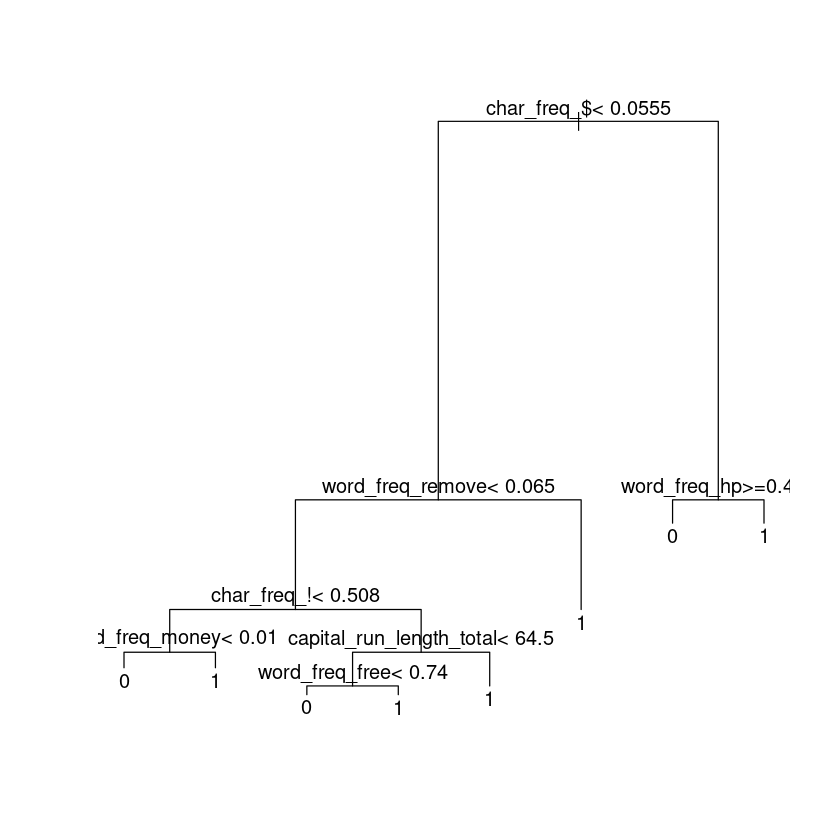

In [7]:
#display the graphic tree
plot(tree)
text(tree)

In [8]:
# Prediction on test dataset
data_test_x <- data_test[,1:57]
tree_predict_data_test <- predict(tree, newdata=data_test_x, type="class")
# Comparaison between real and predicted value
table(tree_predict_data_test, data_test$label)
# Computing error rate
error_rate <- mean(tree_predict_data_test != data_test$label)
cat("error_rate using test data = ",error_rate)

                      
tree_predict_data_test   0   1
                     0 257  23
                     1  12 132

error_rate using test data =  0.08254717

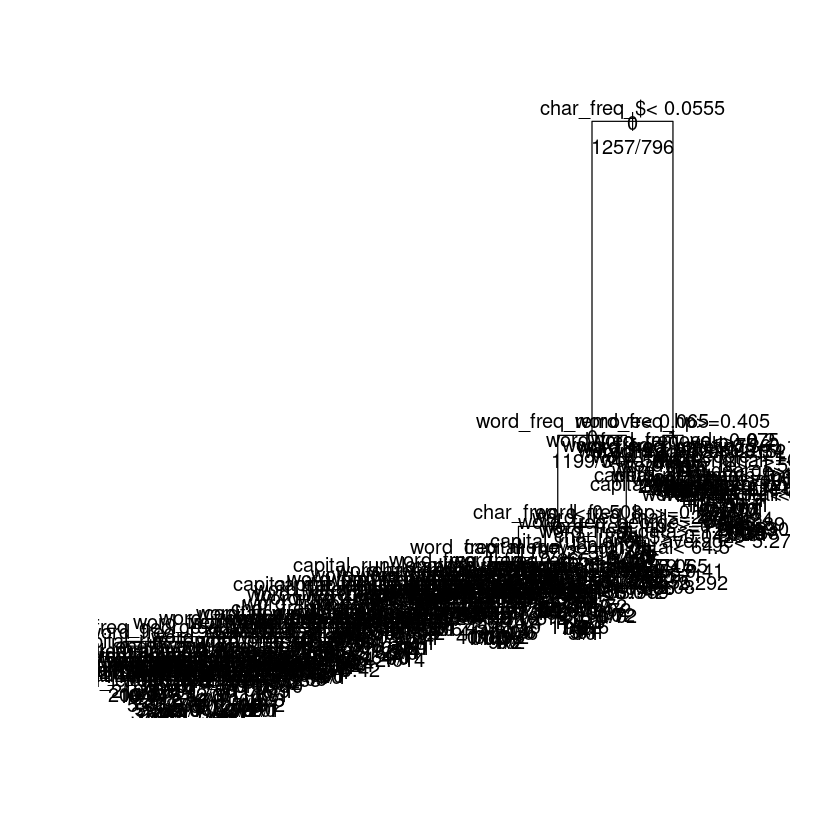

In [9]:
# Tree of maximum length
tree_max <- rpart(label~., data=data_train, minsplit=2,cp=0)
# display graphic tree
par(mfrow=c(1,1))
plot(tree_max)
text(tree_max,use.n = TRUE,all=TRUE)

In [10]:
tree_max_predict_data_test <- predict(tree_max, newdata=data_test_x, type="class")
# Comparaison between real and predicted values
table(tree_max_predict_data_test, data_test$label)
# Computing error rate
error_rate <- mean(tree_max_predict_data_test != data_test$label)
cat("error_rate using test data = ",error_rate)

                          
tree_max_predict_data_test   0   1
                         0 269   0
                         1   0 155

error_rate using test data =  0

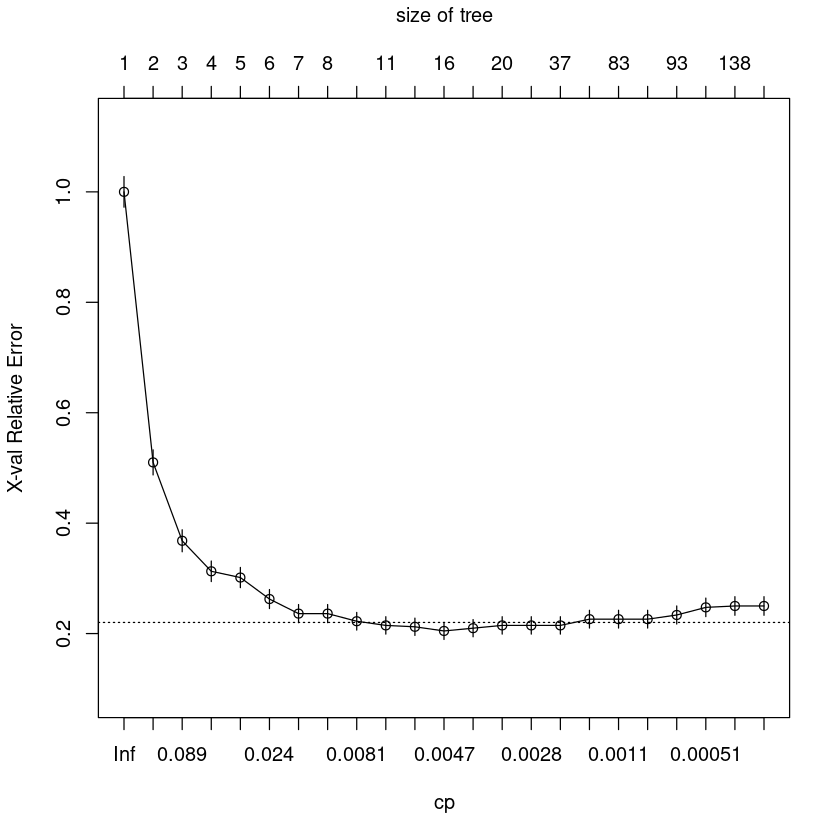

In [11]:
plotcp(tree_max)